In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constants
kT = 1.0  # Boltzmann constant times temperature
epsilon = 1.0  # Depth of potential well
sigma = 1.0  # Finite distance where potential is zero
num_molecules = 30  # Number of molecules
box_size = 10  # Size of the simulation box
max_displacement = 0.1  # Maximum displacement in a single step

# Initialize positions in a 2D lattice
np.random.seed(0)
positions = np.random.rand(num_molecules, 2) * box_size

def lennard_jones_potential(r):
    """ Calculate Lennard-Jones potential for a distance r """
    r6 = (sigma / r)**6
    r12 = r6**2
    return 4 * epsilon * (r12 - r6)

def total_potential_energy(positions):
    """ Compute the total potential energy of the system """
    energy = 0.0
    for i in range(num_molecules):
        for j in range(i+1, num_molecules):
            distance = np.linalg.norm(positions[i] - positions[j])
            energy += lennard_jones_potential(distance)
    return energy

def metropolis_step(positions, total_energy):
    """ Perform one step of the Metropolis algorithm """
    # Choose a random molecule
    molecule_idx = np.random.randint(num_molecules)
    old_position = positions[molecule_idx].copy()

    # Move the molecule to a new position
    displacement = (np.random.rand(2) - 0.5) * max_displacement
    positions[molecule_idx] += displacement

    # Apply periodic boundary conditions
    positions[molecule_idx] %= box_size

    # Calculate the energy change
    new_energy = total_potential_energy(positions)
    delta_energy = new_energy - total_energy

    # Metropolis criterion
    if delta_energy > 0 and np.exp(-delta_energy / kT) < np.random.rand():
        # Reject the move, revert to the old position
        positions[molecule_idx] = old_position
    else:
        # Accept the move, update total energy
        total_energy = new_energy

    return positions, total_energy

# Initialize the total energy
total_energy = total_potential_energy(positions)
total_energy_history = [total_energy]

# Number of steps for the simulation
num_steps = 1010

# Perform the simulation
positions_history = [positions.copy()]
for step in range(1, num_steps * num_molecules):
    positions, total_energy = metropolis_step(positions, total_energy)
    positions_history.append(positions.copy())
    if (step % num_molecules == 0):
        total_energy_history.append(total_energy)

1010


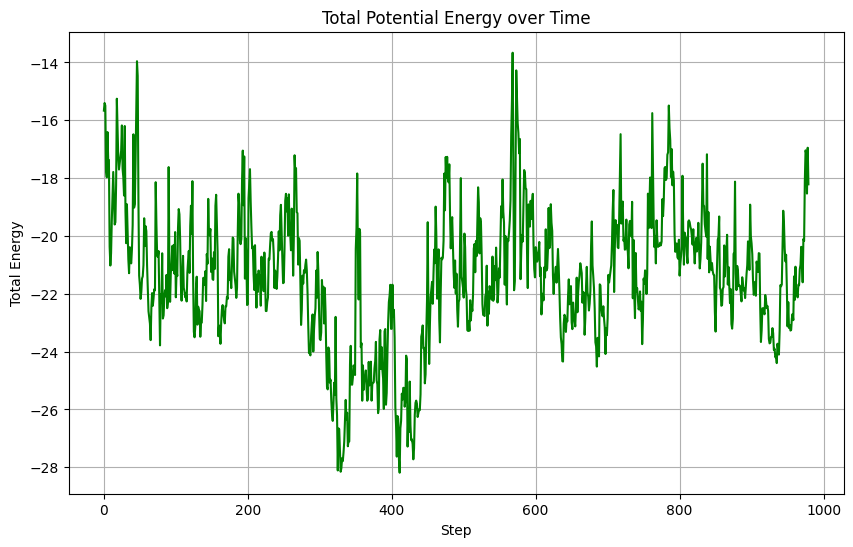

In [61]:
print(len(total_energy_history))
# Plotting the total energy over time
plt.figure(figsize=(10, 6))
plt.plot(total_energy_history[30:], color='green')
plt.title("Total Potential Energy over Time")
plt.xlabel("Step")
plt.ylabel("Total Energy")
plt.grid(True)
plt.show()


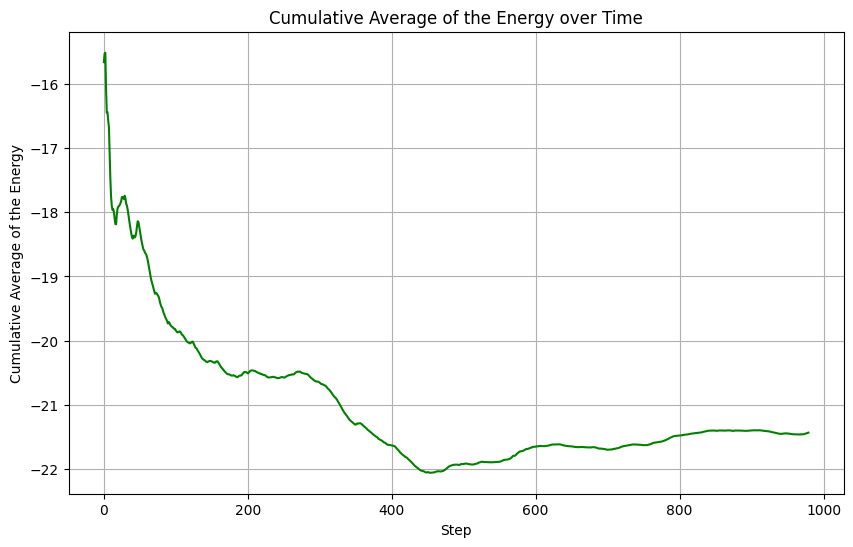

In [69]:
# Cumulative Average of the energy step by step
cum_avg_energy = np.cumsum(total_energy_history[30:]) / (np.arange(len(total_energy_history[30:])) + 1)

# Plotting the cumulative average of the energy over time
plt.figure(figsize=(10, 6))
plt.plot(cum_avg_energy, color='green')
plt.title("Cumulative Average of the Energy over Time")
plt.xlabel("Step")
plt.ylabel("Cumulative Average of the Energy")
plt.grid(True)
plt.show()

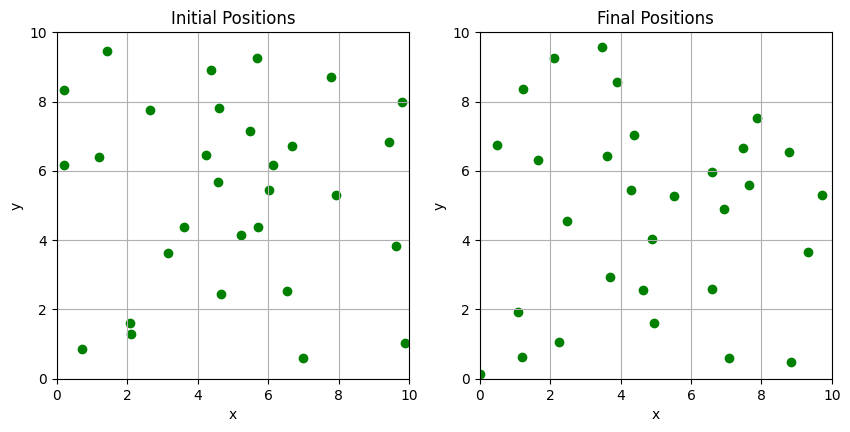

In [81]:
# Plot positions initial and final in two plots but in the same figure
plt.figure(figsize=(10, 4.5))
plt.subplot(1, 2, 1)
plt.scatter(positions_history[0][:, 0], positions_history[0][:, 1], color='green')
plt.title("Initial Positions")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, box_size)
plt.ylim(0, box_size)
plt.grid(True)
plt.subplot(1, 2, 2)
plt.scatter(positions_history[-1][:, 0], positions_history[-1][:, 1], color='green')
plt.title("Final Positions")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, box_size)
plt.ylim(0, box_size)
plt.grid(True)
plt.show()